### Problem:
For most single young people nowadays, dating is a required lesson to be mastered. With the vast development of the whole world, the speed of dating experience is also getting faster than ever, especially for people in their late 20s or 30s, whose time or dating environment is limited to their working hours or daily workspace. So, whether you are more into casual or serious long-term relationships, leaving a good first impression in the first few minutes could be very important. In the dating world, however, a lot of people no matter male or female have the misconception of their own value in the dating market. What’s more, sometimes, they even do not have a clear idea about the desirable attributes from the opposite sex in general. From the view of the opposite sex within the first few minutes, however, singles will have a better understanding of which attributes are considered to be more important compared to some other attributes and then do more investment on their weak parts to perform more curated self-improvement. The objective of this project is to provide the model to help predict the probability of matching pairs with features from both sides. We can also identify feature importance based on the results from the male or female part separately based on similar classification model with less features. Combined with more EDA work along the way, we can help single people with questions like:
1. Is the attractiveness more important than intelligence for male and the opposite is true for female?     
2. Which key attribute do people believe to be the most important and does it hold true for the real case? 

### Clients:
The majority of the clients for this project will be single men and women, especially in America or places sharing similar cultural values, since the dataset is based on experimental speed dating events in the US. What’s more, online dating websites can also leverage the information we get here to make better recommendations for profiles given to a certain user to boost the probability of matching offline later. The process of online dating shares key attributes in common with speed dating and people online also only spend limited time on each person by taking a quick look through the basic profile.

### Data:
The dataset is from Kaggle and used to be gathered from participants in an experimental speed dating events from 2002-2004 compiled by Columbia Business School professors Ray Fisman and Sheena Lyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests. The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. For details, see the link below: 
https://www.kaggle.com/annavictoria/speed-dating-experiment/data

### Approach:
My work is mainly divided to three parts for this speed dating project:
### 1. Exploratory data analysis to find the different behavior between men and women regarding   
(1) What's their own preference for the following attributes: attractiveness, sincereity, intelligence, fun, ambition and shared interests.  
(2) What do they think of their fellow men/women look for in the opposite sex for attractiveness, sincereity, intelligence, fun, ambition and shared interests.  
(3) What do they think of the opposite sex looks for in a date regarding attractiveness, sincereity, intelligence, fun, ambition and shared interests.  
(4) How do they measure up themselves on: attractiveness, sincereity, intelligence, fun and ambition   
(5) How do they think others perceive them on: attractiveness, sincereity, intelligence, fun and ambition  

This group of analysis goes through the similar process which involves:
#### Missing value imputation
Firstly rows with all attributes missing are removed. Then through a peek on the distribution of non missing values for each attributes, we found their distribution are generally not skewed, so we impute the left missing values for each attribute as the mean of the corresponding variable for the left cases.
#### Normalization (optional)
For certain cases, the required total score for all the attributes is 100. So we will scale the attribute score to be total of 100.
#### Visualization
After performing the data preprocessing steps above, a barplot to compare the difference between men and women for each attribute is shown regarding the 5 perspectives listed above. Here is the score is calculated as the mean score for each attribute related to each gender.

### 2. Clustering analysis based on attributes' score for each gender
The second part is based on clustering analysis using K-means clustering to divide men and women into several groups within each gender.
#### Data aggregation
The attribute score for each person is represented by the average attribute score he or she got from the partners they met during the speed dating event.
#### Modeling
A K-means clustering is performed on both men and women and the number of cluster for each group is determined by the inertia metric according to general elbow method. We finally choose number of cluster as 4 for both genders and calculate and visualize the corresponding decision rate or match rate between each pair of groups.
#### Statistical inference
The correlation between each of the five attributes: attractiveness, sincerity, intelligence, fun and ambition is printed and visualized by pairplot. It provides more insights for us about the relationship between each attribute.

### 3. Gain attributes' importance by building random forest model
Here we build three models for men's decision, women's decision and the final match rate separately with random forest algorithm.
#### Data wrangling and feature engineering
To facilitate the whole process, rows for men and rows for women are merged together by using 'pid' and 'iid' as the key. Then related features are selected with a certain gender (men is chosen for this project) since each met for two sides is the same. Additional features like age difference and difference for each attribute are generated. We also created the variable to identify if two people are the same race, coming from the same study background and coming from the same place(state) here hoping these features will add more power for the final decision during the dating phase. For the 'from' variable, there are many typos or synonyms inside for both genders, so a bacis data cleaning is done for the variable. Missing values are treated this way: categorical variable is imputed by mode and numeric variable is imputed by mean of the corresponding column. Finally before going through the modeling part, the several categorical variables are encoded by 'LabelEncoder' function to avoid further error in random forest models later.
#### Machine learning model training
Three separate models are built against the men's decision, women's decision and match rate individually. A ROC curve and attributes' importance plots are also generated along the way which gives us a straight forward idea about the model accuracy and insights about different variables' importance. Since the project is more into insights for important attributes for further dating purpose or analysis, accuracy itself, though is required to not be overfitting or too low, is not our main concern here, we will not bother to build some other models for comparison or give some ensembling models for better accuracy with the sacrifice of the interpretation here.

Concusion and summary are embedded in the notebook below:

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from scipy import stats

In [2]:
dating = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")

In [3]:
dating.shape

(8378, 195)

In [4]:
dating.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dating.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

It's a rather wide dataset with lots of columns given to us. The first important thing is to select only the related features for each different analysis purpose. Let's firstly do several analysis based on the filled in information on the survey, then explore more by different clusters of people or machine learning models.

## 1. Exploratory data analysis to find the different attitude between men and women on the following 5 perspective

### Firstly we would like to find are there any attributes' preference differences between the male and the female?

In [6]:
dating_pf = dating[['iid', 'gender', 'wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].drop_duplicates().set_index('iid')

In [7]:
dating_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 1 to 552
Data columns (total 8 columns):
gender      551 non-null int64
wave        551 non-null int64
attr1_1     544 non-null float64
sinc1_1     544 non-null float64
intel1_1    544 non-null float64
fun1_1      543 non-null float64
amb1_1      542 non-null float64
shar1_1     541 non-null float64
dtypes: float64(6), int64(2)
memory usage: 38.7 KB


In [8]:
dating_pf.describe()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,551.000000,551.000000,544.000000,544.000000,544.000000,543.000000,542.000000,541.000000
mean,0.502722,11.083485,22.685478,17.290754,20.170478,17.451363,10.806476,11.832126
std,0.500447,6.013947,12.971917,7.204724,6.878993,6.190985,6.229105,6.474104
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,15.000000,14.927500,17.292500,15.000000,5.000000,8.330000
50%,1.000000,11.000000,20.000000,18.000000,20.000000,18.000000,10.000000,11.000000
75%,1.000000,15.000000,25.000000,20.000000,23.020000,20.000000,15.000000,16.000000
max,1.000000,21.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


From the info and describption above, there are NaN values for different attributes, but overall the values are in the 
range between 0 and 100. We will need to deal with NaN values later and try to rescale the attributes' values in certain rows to be total of 100 if not the case.

In [9]:
# check if there are still duplicate iids
len(dating_pf.index.unique()) == len(dating_pf.index)

True

In [10]:
## need to check attributes' values from wave 6 to 9 here since it's mentioned in the doc key that the scale method for
## this few waves are different from the other waves:
dating_pf[(dating_pf['wave'] >= 6) & (dating_pf['wave'] <= 9)].head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
132,0,6,16.67,16.67,16.67,16.67,16.67,16.67
133,0,6,12.77,19.15,17.02,17.02,14.89,19.15
134,0,6,6.67,20.00,20.00,17.78,20.00,15.56
135,0,6,18.18,22.73,18.18,13.64,13.64,13.64
136,0,6,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
## Actually even though for wave 6-9, the score scale is different, the original data for the certain waves is already 
## normalized to sum up to 100 as other waves
dating_pf.head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


In [12]:
pd.isnull(dating_pf).any(axis = 0)

gender      False
wave        False
attr1_1      True
sinc1_1      True
intel1_1     True
fun1_1       True
amb1_1       True
shar1_1      True
dtype: bool

In [13]:
# From the above results, we can see only the 6 attributes preferences having NA values here, we will first remove the 
# rows with NaN values for all 6 attributes:
boolean = pd.isnull(dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']]).all(axis = 1)
dating_pf = dating_pf[-boolean]

In [14]:
dating_pf.shape

(544, 8)

In [15]:
pd.isnull(dating_pf).any()

gender      False
wave        False
attr1_1     False
sinc1_1     False
intel1_1    False
fun1_1       True
amb1_1       True
shar1_1      True
dtype: bool

60.0 0.0
50.0 0.0
50.0 0.0


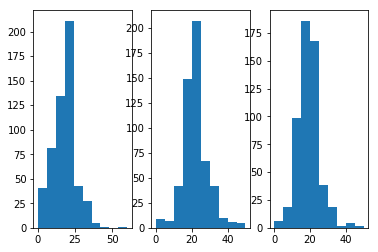

In [16]:
for i in range(3, 6):
    plt.subplot(1, 3, i - 2)
    plt.hist(dating_pf.iloc[:,i].dropna())
    print(max(dating_pf.iloc[:,i]), min(dating_pf.iloc[:,i]))

In [17]:
# From the histogram of the three attributes containing NA above, we can see that all the variables are not highly skewed which lead us 
# to replace the NA value safely with mean value:
dating_pf[['fun1_1', 'amb1_1','shar1_1']] = dating_pf[['gender', 'fun1_1', 'amb1_1','shar1_1']]. \
groupby('gender').transform(lambda x: x.fillna(x.mean()))

In [18]:
# For cases the sum of all 6 attributes not equal to 100, we will normalize them to 100 here
dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']] = dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [19]:
dating_pf.head(5)

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


In [20]:
dating_pf.groupby('gender')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
gender,,,,,,
0,18.005019,18.219814,20.964126,17.296914,12.816654,12.697918
1,27.122182,16.322545,19.343964,17.549927,8.736036,10.925600


Take the attributes' importance here for example to do statistical testing practice to see if there are some real difference between gender across different attribute:

In [138]:
stats.ttest_ind(dating_pf.loc[dating_pf.gender == 0, 'attr1_1'], dating_pf.loc[dating_pf.gender == 1, 'attr1_1'])

Ttest_indResult(statistic=-8.8710561594176678, pvalue=1.0508724584998778e-17)

In [139]:
stats.ttest_ind(dating_pf.loc[dating_pf.gender == 0, 'sinc1_1'], dating_pf.loc[dating_pf.gender == 1, 'sinc1_1'])

Ttest_indResult(statistic=3.0970013200017141, pvalue=0.0020560801625511558)

In [140]:
stats.ttest_ind(dating_pf.loc[dating_pf.gender == 0, 'intel1_1'], dating_pf.loc[dating_pf.gender == 1, 'intel1_1'])

Ttest_indResult(statistic=2.7569430408675433, pvalue=0.0060311169370419974)

In [141]:
stats.ttest_ind(dating_pf.loc[dating_pf.gender == 0, 'fun1_1'], dating_pf.loc[dating_pf.gender == 1, 'fun1_1'])

Ttest_indResult(statistic=-0.47622470862029698, pvalue=0.63410620687175023)

In [142]:
stats.ttest_ind(dating_pf.loc[dating_pf.gender == 0, 'amb1_1'], dating_pf.loc[dating_pf.gender == 1, 'amb1_1'])

Ttest_indResult(statistic=8.3555364516420827, pvalue=5.4933874800904099e-16)

In [143]:
stats.ttest_ind(dating_pf.loc[dating_pf.gender == 0, 'shar1_1'], dating_pf.loc[dating_pf.gender == 1, 'shar1_1'])

Ttest_indResult(statistic=3.2358625300926982, pvalue=0.0012867752239691663)

It seems all attributes except fun are different between genders with a 95% confidence level.

In [137]:
dating_pf.head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


Let's visualize the result by barplots then:

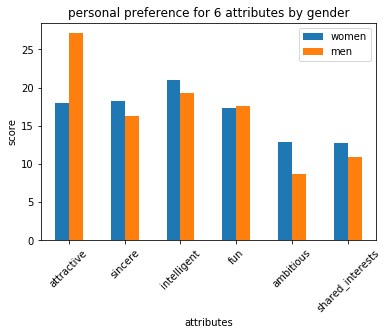

In [21]:
dating_pf.groupby('gender')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean().T.plot(kind = 'bar',title = 'personal preference for 6 attributes by gender')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

From the result, we can see on average (at least from what are filled in the survey) men prefer attractiveness more than women, while women will compensate the 
outlook by ambitious, shared interests, sincerity and intelligence. It seems that women are more likely to date a well-rounded person than male. While fun seems to be equally important to both genders.

The top 3 valued attributes by male are: attractive, intelligent and fun

The top 3 valued attributes by female are: intelligent, attractive and sincere

The several analysis below follows similar analytical patterns with limited comments and explanation except the resulting part.


### What do you think of your fellow men/women look for in the opposite sex?

In [22]:
dating_fellow = dating[['iid', 'gender', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].drop_duplicates().set_index('iid')

In [23]:
dating_fellow.shape

(551, 7)

In [24]:
dating_fellow.tail()

,gender,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
iid,,,,,,,
548,1,60.0,0.0,0.0,20.0,0.0,20.0
549,1,50.0,10.0,5.0,20.0,5.0,10.0
550,1,30.0,3.0,30.0,30.0,3.0,4.0
551,1,25.0,5.0,20.0,20.0,15.0,15.0
552,1,90.0,0.0,0.0,0.0,0.0,10.0


In [25]:
# remove the rows with all attributes being NA
boolean = pd.isnull(dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1','shar4_1']]).all(axis = 1)
dating_fellow = dating_fellow[-boolean]

In [26]:
dating_fellow.shape

(417, 7)

In [27]:
pd.isnull(dating_fellow).any()

gender      False
attr4_1     False
sinc4_1     False
intel4_1    False
fun4_1      False
amb4_1      False
shar4_1      True
dtype: bool

(array([  24.,   92.,  160.,   66.,   12.,   49.,    8.,    4.,    0.,    1.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.]),
 <a list of 10 Patch objects>)

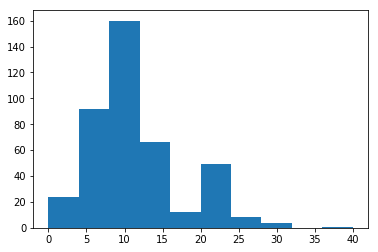

In [28]:
plt.hist(dating_fellow.iloc[:,6].dropna())

In [29]:
# Then impute the left NaN values to be the mean value for shar4_1 attribute within each gender group
dating_fellow[['shar4_1']] = (dating_fellow[['gender', 'shar4_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [30]:
# due to the scale difference, we should also normalize the row to sum to 100 
dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']] = dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [31]:
dating_fellow.head()

,gender,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
iid,,,,,,,
132,0,23.26,16.28,16.28,16.28,11.63,16.28
133,0,17.07,17.07,17.07,17.07,14.63,17.07
134,0,13.64,20.45,20.45,15.91,15.91,13.64
135,0,16.33,16.33,16.33,18.37,18.37,14.29
137,1,21.95,14.63,12.20,19.51,12.20,19.51


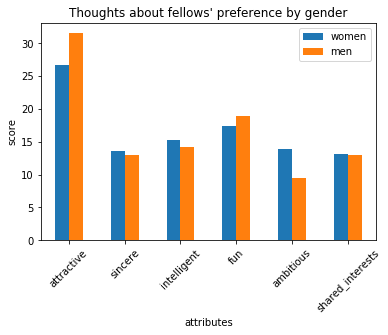

In [32]:
dating_fellow.groupby('gender')['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'].mean().T.plot(kind = 'bar', title = r"Thoughts about fellows' preference by gender")
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

The interesting find of this plot compared to the first plot is that people seem to natively think of their fellow to value attractiveness much more the other attributes, even for women who are said to prefer attractiveness less than men are considered to value the outlook way more important than other attributes like sincere, intelligence by their fellow.

### What do you think of the opposite sex looks for in a date?

In [33]:
dating_opp = dating[['iid', 'gender', 'wave', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].drop_duplicates().set_index('iid')

In [34]:
dating_opp.head()

,gender,wave,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
iid,,,,,,,,
1,0,1,35.0,20.0,15.0,20.0,5.0,5.0
2,0,1,65.0,0.0,10.0,25.0,0.0,0.0
3,0,1,50.0,0.0,20.0,30.0,0.0,0.0
4,0,1,30.0,10.0,15.0,30.0,5.0,10.0
5,0,1,50.0,10.0,10.0,20.0,5.0,5.0


In [35]:
dating_opp.shape

(551, 8)

In [36]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1','shar2_1']]).all(axis = 1)
dating_opp = dating_opp[-boolean]

In [37]:
dating_opp.shape

(544, 8)

In [38]:
pd.isnull(dating_opp).any()

gender      False
wave        False
attr2_1     False
sinc2_1     False
intel2_1    False
fun2_1      False
amb2_1       True
shar2_1      True
dtype: bool

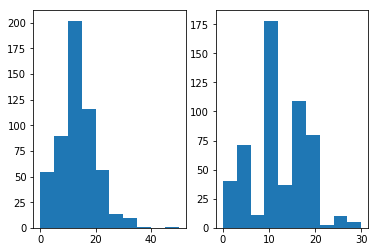

In [39]:
for i in range(6, 8):
    plt.subplot(1, 2, i - 5)
    plt.hist(dating_opp.iloc[:,i].dropna())

In [40]:
# Then impute the left NaN values to be the mean value for each attribute within each gender group
dating_opp[['amb2_1','shar2_1']] = (dating_opp[['gender', 'amb2_1','shar2_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [41]:
dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']] = dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [42]:
dating_opp.shape

(544, 8)

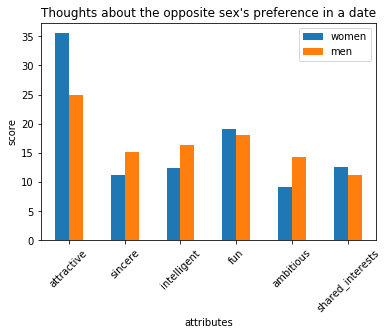

In [43]:
dating_opp.groupby('gender')['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'].mean().T.plot(kind = 'bar', title = r"Thoughts about the opposite sex's preference in a date")
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

The comparison results between men and women are quite aligned to the first finding for personal preference, however the absolute scores for each attributes differ from the first one in that attractiveness keep getting overvalued here, while other attributes like intelligence and sincerity are overlooked. Generally speaking, people would like to speak higher of sincere or intelligence score when asked about their own preference, but when asked about their thoughts about fellow or opposite sex's preference, they believe the outlook is valued more...

### How do you measure up yourself?

In [44]:
dating_measure = dating[['iid', 'gender', 'wave', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].drop_duplicates().set_index('iid')

In [45]:
dating_measure.head()

,gender,wave,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
iid,,,,,,,
1,0,1,6.0,8.0,8.0,8.0,7.0
2,0,1,7.0,5.0,8.0,10.0,3.0
3,0,1,8.0,9.0,9.0,8.0,8.0
4,0,1,7.0,8.0,7.0,9.0,8.0
5,0,1,6.0,3.0,10.0,6.0,8.0


In [46]:
dating_measure.shape

(551, 7)

In [47]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_measure[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]).all(axis = 1)
dating_measure = dating_measure[-boolean]

In [48]:
dating_measure.shape

(542, 7)

In [49]:
pd.isnull(dating_measure).any()

gender      False
wave        False
attr3_1     False
sinc3_1     False
intel3_1    False
fun3_1      False
amb3_1      False
dtype: bool

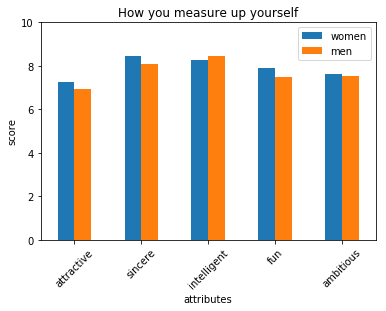

In [50]:
dating_measure.groupby('gender')['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How you measure up yourself')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

From the measurement result, we do not see any significant difference among the attributes between two genders, however on average women seem to be more confident on all the attributes (attractive, sincere, fun and ambitious) except (intelligence).

### How do you think others perceive you?

In [51]:
dating_others = dating[['iid', 'gender', 'wave', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].drop_duplicates().set_index('iid')

In [52]:
dating_others.tail()

,gender,wave,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
iid,,,,,,,
548,1,21,10.0,10.0,10.0,10.0,10.0
549,1,21,7.0,10.0,10.0,7.0,7.0
550,1,21,7.0,7.0,7.0,7.0,7.0
551,1,21,7.0,9.0,9.0,2.0,4.0
552,1,21,9.0,7.0,10.0,5.0,9.0


In [53]:
dating_others.shape

(551, 7)

In [54]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_others[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]).all(axis = 1)
dating_others = dating_others[-boolean]

In [55]:
dating_others.shape

(314, 7)

In [56]:
pd.isnull(dating_others).any()

gender      False
wave        False
attr5_1     False
sinc5_1     False
intel5_1    False
fun5_1      False
amb5_1      False
dtype: bool

In [57]:
dating_others.shape

(314, 7)

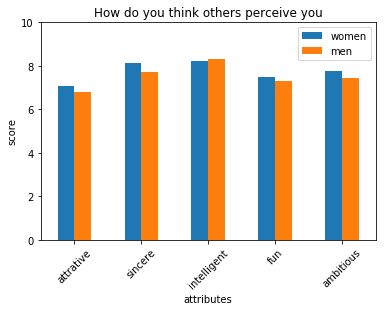

In [58]:
dating_others.groupby('gender')['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How do you think others perceive you')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attrative', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

The average result is pretty close to the above result from 'how do you measure up yourself' which makes sense since people's measurement about themselves are also keeping effected by others. It results in the fact that most people would end up measuring them up with a similar scoare to what most people perceive about them.

Next, let's cluster people by gender according to their attributes' value (measured by average score got from the opposite sex), then explore the match or decision rate between each cluster pairs:

## 2. Clustering analysis

### Cluster people based on their own features by gender and then calculate the one-sided decision rate or match rate for each pair of cluster

In [59]:
dating.shape

(8378, 195)

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [103]:
men_cluster = dating[dating['gender'] == 1]
women_cluster = dating[dating['gender'] == 0]

In [104]:
men_cluster.shape, women_cluster.shape

((4194, 195), (4184, 195))

In [106]:
## men or women's general decision rate
men_cluster.dec.mean(), women_cluster.dec.mean()

(0.47424892703862659, 0.36543977055449328)

So on average men are more likely to agree to see the partner again.

In [107]:
men_cluster = men_cluster[['iid', 'attr_o', 'sinc_o', 
                          'intel_o', 'fun_o', 'amb_o']]

In [108]:
men_cluster.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
100,11,6.0,9.0,7.0,7.0,6.0
101,11,5.0,7.0,8.0,4.0,6.0
102,11,7.0,9.0,10.0,7.0,8.0
103,11,4.0,10.0,8.0,5.0,8.0
104,11,5.0,8.0,8.0,2.0,2.0


In [109]:
pd.isnull(men_cluster).any()

iid        False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [110]:
men_cluster[men_cluster.isnull().any(axis = 1)].head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
515,40,4.0,8.0,7.0,9.0,NaN
526,41,7.0,8.0,NaN,NaN,8.0
534,41,7.0,8.0,9.0,NaN,9.0
545,42,6.0,8.0,NaN,7.0,NaN
564,43,7.0,8.0,8.0,8.0,NaN


Use the mean value each person got from the opposite sex as the proxy of their true score for each attribute

In [362]:
# directly calculate the mean of each attribute for each person ignoring the NaN value
men_cluster = men_cluster.groupby('iid').agg(np.mean)

In [112]:
men_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 11 to 552
Data columns (total 5 columns):
attr_o     277 non-null float64
sinc_o     277 non-null float64
intel_o    277 non-null float64
fun_o      277 non-null float64
amb_o      277 non-null float64
dtypes: float64(5)
memory usage: 13.0 KB


In [113]:
men_cluster.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
11,5.6,8.8,8.2,5.4,6.4
12,7.1,6.6,7.1,6.7,6.9
13,4.8,7.9,8.8,7.0,5.9
14,8.2,7.6,7.4,7.6,6.6
15,5.7,7.6,7.7,7.2,6.5


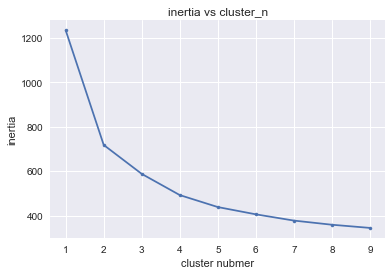

In [114]:
from sklearn.cluster import KMeans
clusterNumber = np.arange(1, 10)
inertia_men = np.empty(len(clusterNumber))
for i, number in enumerate(clusterNumber):
    model = KMeans(n_clusters = number, random_state= 42)
    model.fit(men_cluster)
    inertia_men[i] = model.inertia_

## draw the plot for inertia metric against the number of clusters
plt.plot(clusterNumber, inertia_men,  marker = '.')
plt.title('inertia vs cluster_n')
plt.xlabel('cluster nubmer')
plt.ylabel('inertia')
plt.show()

Text(0.5,1,"Men' sttributes centroids for 4 clusters")

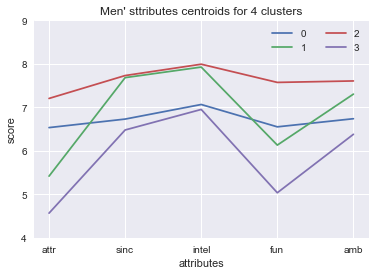

In [115]:
# from the above result, I would like to make the cluster number for men to be 4
men_model = KMeans(n_clusters = 4, random_state = 42)
men_model.fit(men_cluster)
men_centroids = men_model.cluster_centers_
for i in range(4):
    plt.plot(np.arange(5), men_centroids[i])
plt.xlabel('attributes')
plt.xticks(np.arange(5), ['attr', 'sinc', 'intel', 'fun', 'amb'])
plt.ylabel('score')
plt.ylim([4, 9])
plt.legend(np.arange(4), loc = 'upper right', ncol= 2)
plt.title(r"Men' sttributes centroids for 4 clusters")

In [116]:
# from the above four groups, we can define them separately as: all sided, good looking, average looking and low status
all_sided_m = men_cluster[men_model.labels_ == 2]
print(all_sided_m.head())
good_looking_m = men_cluster[men_model.labels_ == 0]
print(good_looking_m.head())
average_looking_m = men_cluster[men_model.labels_ == 1]
print(average_looking_m.head())
low_status_m = men_cluster[men_model.labels_ == 3]
print(low_status_m.head())

     attr_o    sinc_o   intel_o  fun_o     amb_o
iid                                             
14      8.2  7.600000  7.400000    7.6  6.600000
19      7.7  6.800000  7.700000    8.5  7.100000
20      7.5  7.300000  7.900000    8.2  8.400000
69      7.3  7.600000  7.900000    7.1  7.111111
70      6.0  7.444444  8.555556    8.0  8.444444
       attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                  
12   7.100000  6.600000  7.100000  6.700000  6.900000
46   7.631579  6.789474  7.315789  6.777778  6.294118
48   6.736842  6.263158  5.894737  6.789474  5.631579
49   6.315789  7.055556  7.500000  6.973684  7.055556
50   6.315789  6.578947  7.388889  7.631579  7.666667
     attr_o  sinc_o  intel_o  fun_o  amb_o
iid                                       
11      5.6     8.8      8.2    5.4    6.4
13      4.8     7.9      8.8    7.0    5.9
15      5.7     7.6      7.7    7.2    6.5
16      5.6     8.4      7.6    4.4    6.0
17      6.7     7.6  

In [117]:
women_cluster = women_cluster[['iid', 'attr_o', 'sinc_o', 
                          'intel_o', 'fun_o', 'amb_o']]

In [118]:
women_cluster.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
0,1,6.0,8.0,8.0,8.0,8.0
1,1,7.0,8.0,10.0,7.0,7.0
2,1,10.0,10.0,10.0,10.0,10.0
3,1,7.0,8.0,9.0,8.0,9.0
4,1,8.0,7.0,9.0,6.0,9.0


In [119]:
pd.isnull(women_cluster).any()

iid        False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [120]:
women_cluster[women_cluster.isnull().any(axis = 1)].head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
24,3,6.0,10.0,8.0,6.0,NaN
74,8,9.0,9.0,8.0,9.0,NaN
95,10,NaN,8.0,7.0,7.0,7.0
210,21,5.0,8.0,8.0,NaN,NaN
223,22,NaN,5.0,6.0,5.0,6.0


In [121]:
women_cluster = women_cluster.groupby('iid').agg(np.mean)
women_cluster.info()
women_cluster.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 1 to 530
Data columns (total 5 columns):
attr_o     274 non-null float64
sinc_o     274 non-null float64
intel_o    274 non-null float64
fun_o      274 non-null float64
amb_o      274 non-null float64
dtypes: float64(5)
memory usage: 12.8 KB


,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
1,6.7,7.4,8.0,7.2,8.000000
2,7.7,7.1,7.9,7.5,7.500000
3,6.5,7.1,7.3,6.2,7.111111
4,7.0,7.1,7.7,7.5,7.700000
5,5.3,7.7,7.6,7.2,7.800000


In [122]:
women_cluster.shape

(274, 5)

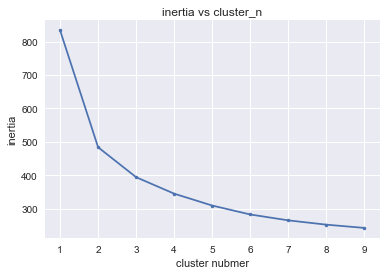

In [123]:
clusterNumber = np.arange(1, 10)
inertia_women = np.empty(len(clusterNumber))
for i, number in enumerate(clusterNumber):
    model = KMeans(n_clusters = number)
    model.fit(women_cluster)
    inertia_women[i] = model.inertia_
plt.plot(clusterNumber, inertia_women,  marker = '.')
plt.title('inertia vs cluster_n')
plt.xlabel('cluster nubmer')
plt.ylabel('inertia')
plt.show()

Text(0.5,1,"Women' Attributes centroids for 4 clusters")

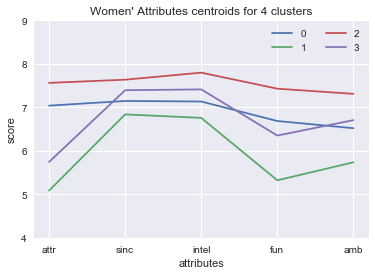

In [124]:
# from the above result, I would like to make the cluster number for women to be 4
women_model = KMeans(n_clusters = 4, random_state = 42)
women_model.fit(women_cluster)
women_centroids = women_model.cluster_centers_
for i in range(4):
    plt.plot(np.arange(5), women_centroids[i])
plt.xlabel('attributes')
plt.xticks(np.arange(5), ['attr', 'sinc', 'intel', 'fun', 'amb'])
plt.ylabel('score')
plt.ylim([4, 9])
plt.legend(np.arange(4), loc = 'upper right', ncol= 2)
plt.title(r"Women' Attributes centroids for 4 clusters")

In [125]:
# the clustering results are quite similar to the results for men, so here we also divide women as: all_sided, good looking,
# average looking and low status
all_sided_w = women_cluster[women_model.labels_ == 2]
print(all_sided_w.head())
good_looking_w = women_cluster[women_model.labels_ == 0]
print(good_looking_w.head())
average_looking_w = women_cluster[women_model.labels_ == 3]
print(average_looking_w.head())
low_status_w = women_cluster[women_model.labels_ == 1]
print(low_status_w.head())

     attr_o  sinc_o  intel_o  fun_o  amb_o
iid                                       
1       6.7     7.4      8.0    7.2    8.0
2       7.7     7.1      7.9    7.5    7.5
4       7.0     7.1      7.7    7.5    7.7
6       6.8     7.8      8.6    7.0    8.0
7       7.9     7.6      8.2    7.0    7.5
       attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                  
10   6.333333  7.000000  6.400000  6.400000  6.200000
24   6.500000  6.933333  7.333333  6.625000  6.714286
25   7.687500  7.266667  6.933333  7.333333  6.000000
26   7.625000  7.133333  7.266667  7.466667  6.500000
28   6.625000  7.437500  7.250000  6.375000  6.625000
     attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                
3    6.5000  7.100000  7.300000  6.200000  7.111111
5    5.3000  7.700000  7.600000  7.200000  7.800000
21   5.0625  7.312500  7.750000  5.666667  6.666667
23   5.9375  7.266667  6.937500  6.250000  6.400000
29   5.75

In [126]:
## Here we will calculate the match and decision rate between each group within each gender
men_side = [all_sided_m, good_looking_m, average_looking_m, low_status_m]
women_side = [all_sided_w, good_looking_w, average_looking_w, low_status_w]
match_rate = np.zeros((4, 4))
men_dec = np.zeros((4, 4))
women_dec = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        result = dating.merge(men_side[i], left_on = 'iid', right_index = True).merge(women_side[j], left_on = 'pid', right_index = True)[['match', 'dec', 'dec_o']] 
        match_rate[i, j] = sum(result['match']) / len(result['match'])
        men_dec[i, j] = sum(result['dec']) / len(result['dec'])
        women_dec[i, j] = sum(result['dec_o']) / len(result['dec_o'])

In [127]:
print(match_rate)
print(men_dec)
print(women_dec)

[[ 0.42145594  0.28482972  0.17131474  0.06321839]
 [ 0.32644628  0.22289157  0.13946588  0.03255814]
 [ 0.19130435  0.14473684  0.13963964  0.1183432 ]
 [ 0.09795918  0.05952381  0.07536232  0.09090909]]
[[ 0.65517241  0.51393189  0.25896414  0.1091954 ]
 [ 0.66528926  0.54216867  0.26706231  0.13023256]
 [ 0.70869565  0.625       0.47747748  0.38461538]
 [ 0.74285714  0.60714286  0.40869565  0.27777778]]
[[ 0.6091954   0.51393189  0.64940239  0.60344828]
 [ 0.44628099  0.36445783  0.49851632  0.45116279]
 [ 0.29130435  0.20394737  0.30630631  0.32544379]
 [ 0.13469388  0.08630952  0.22608696  0.25252525]]


Text(0.5,1,"Men's decision between each group")

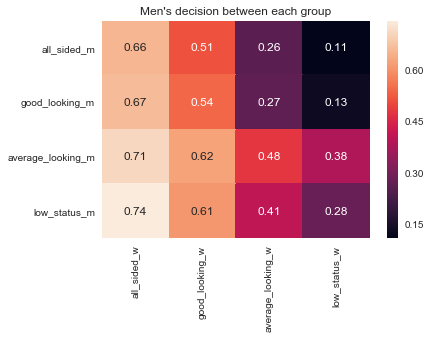

In [132]:
ylabels = ['all_sided_m', 'good_looking_m', 'average_looking_m', 'low_status_m']
xlabels = ['all_sided_w', 'good_looking_w', 'average_looking_w', 'low_status_w']
ax = sns.heatmap(men_dec, xticklabels = xlabels, yticklabels = ylabels, annot=True)
ax.set_title('Men\'s decision between each group')

The above heatmap follows a clear pattern that generally the less popular group will give a higher decision rate for the corresponding more popular group. For example, as for the most attractive female group, the low_status_m gives a rather high approval rate 0.74 which is higher than the other three groups. It seems men would always likely to pursue women who are more attractive or popular than they are. Then what about the bahavior for women:

Text(0.5,1,"Women's decision between each group")

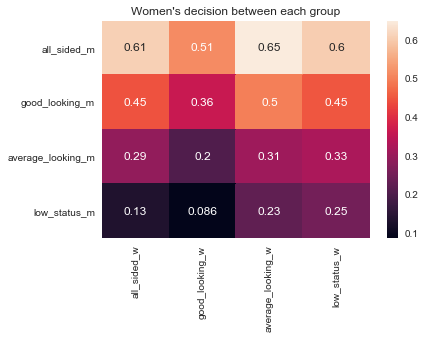

In [133]:
ax1 = sns.heatmap(women_dec, xticklabels = xlabels, yticklabels = ylabels, annot=True)
ax1.set_title('Women\'s decision between each group')

For women, although there is still a general preference for most popular/attractive male group shown from the higher decision rate for all_sided_m than the other 3 groups (good_looking_m, average_looking_m, low_status_m), the difference response given among the female group is not as distinct as male. As we can see a rather flat pattern among each given row, not as sorted as that in the heatmap based on men's decision. It may show that women may generally not give extra credit for men who are out of their league as men do.

Text(0.5,1,'Match rate between each group')

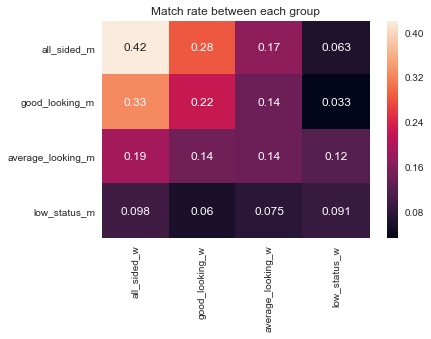

In [134]:
ax2 = sns.heatmap(match_rate, xticklabels = xlabels, yticklabels = ylabels, annot=True)
ax2.set_title('Match rate between each group')

The heatmap for match rate also shows clear pattern no matter column wise or row wise, since most popular/attractive men/women group will have a higher match rate with any group in the opposite gender on average. The match game will always favor the more attractive cluster in that sense for both men and women. Let's find the correlation between those attributes for both men and women:

In [144]:
print(men_cluster.corr())
print(women_cluster.corr())

           attr_o    sinc_o   intel_o     fun_o     amb_o
attr_o   1.000000  0.305299  0.279350  0.718045  0.323098
sinc_o   0.305299  1.000000  0.687746  0.373396  0.418470
intel_o  0.279350  0.687746  1.000000  0.374089  0.656451
fun_o    0.718045  0.373396  0.374089  1.000000  0.450813
amb_o    0.323098  0.418470  0.656451  0.450813  1.000000
           attr_o    sinc_o   intel_o     fun_o     amb_o
attr_o   1.000000  0.264840  0.372222  0.648896  0.495067
sinc_o   0.264840  1.000000  0.643742  0.370305  0.341931
intel_o  0.372222  0.643742  1.000000  0.394013  0.636671
fun_o    0.648896  0.370305  0.394013  1.000000  0.578336
amb_o    0.495067  0.341931  0.636671  0.578336  1.000000


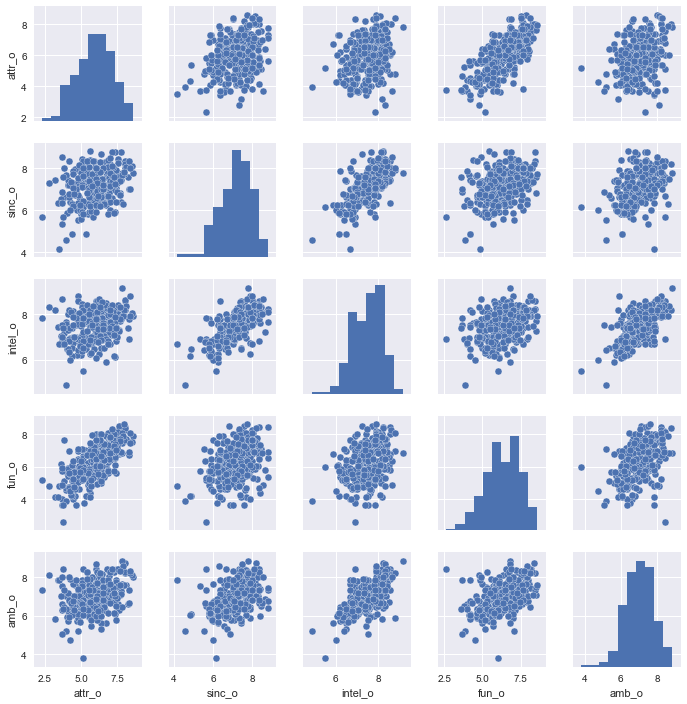

In [147]:
sns.pairplot(men_cluster, size=2)

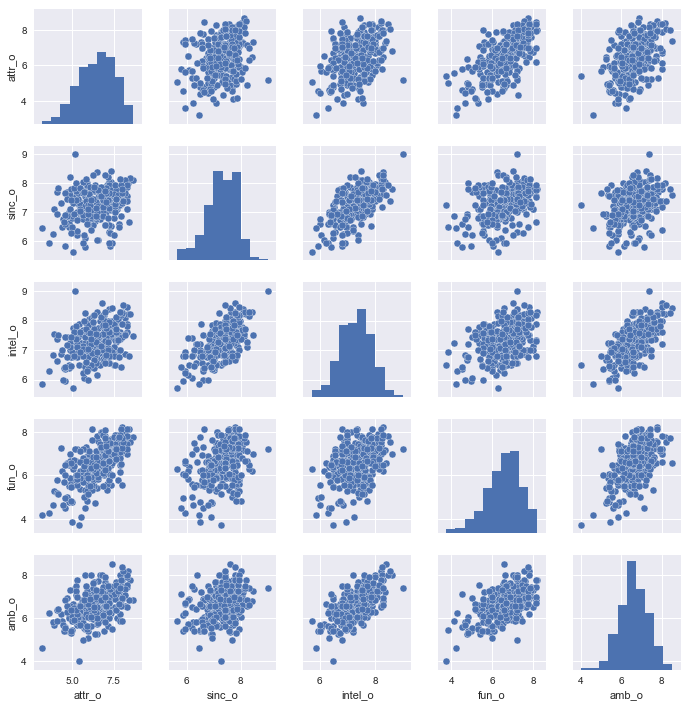

In [148]:
sns.pairplot(women_cluster, size=2)

From the attributes' correlation pairplots for both men and women, we can see that the results are similar to each other. Attractiveness and fun are strongly correlated, while intelligence are strongly correlated with fun and ambitious while ambitious and fun are not strongly related to each other. The results are aligned with our previous analysis referred to the cluster plots above. Attractiveness and fun are more external attributes while the other three are internal ones. It seems the score for fun and attractiveness can be affected each other, a funny person can be seen as more attractive, while a more attractive person can also be scored higher for the fun attribute. Some similar result applies for sinc/intel/amb attributes as well. Let's take a look at their own variance:

In [149]:
print(men_cluster.var())
print(women_cluster.var())

attr_o     1.493908
sinc_o     0.634789
intel_o    0.440148
fun_o      1.278153
amb_o      0.624841
dtype: float64
attr_o     1.171426
sinc_o     0.305520
intel_o    0.321507
fun_o      0.755404
amb_o      0.503371
dtype: float64


The resulting variance for attractive and fun are much larger than the other three attributes. It seems that attractiveness and fun can be easily scored or detected in a short time during speed dating event, while sincerity/intelligence/ambitiousness need more time to be evaluated which leads to less variance across these three attributes. The pattern for men and women are pretty similar.

## 3. Machine learning

With the sense of different scoring results between men and women from part I, and also the clustering results bewteen groups and correlation between main attributes from part 2, we have a basic idea of which several attributes play more important role in the partner choosing phase. Let's dive into more about attributes importance by building random forest model for each gender below:

In [216]:
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None

In [217]:
## using domain knowledge about partner selection, the attributes from the original dataset below are selected 
model_data = dating[['iid','gender','pid','samerace','int_corr', 'match', 'age',
             'race','attr','sinc','intel','fun','amb', 'dec', 'dec_o', 'from', 'field_cd']].merge(
    dating[['iid', 'pid', 'age', 'attr', 'sinc', 'intel', 'fun', 'amb', 'race', 'from', 'field_cd']], 
                                         left_on = ['pid', 'iid'], right_on = ['iid', 'pid'])

In [218]:
model_data.shape

(8368, 28)

In [219]:
model_data.head()

,iid_x,gender,pid_x,samerace,int_corr,match,age_x,race_x,attr_x,sinc_x,intel_x,fun_x,amb_x,dec,dec_o,from_x,field_cd_x,iid_y,pid_y,age_y,attr_y,sinc_y,intel_y,fun_y,amb_y,race_y,from_y,field_cd_y
0,1,0,11,0,0.14,0,21.0,4.0,6.0,9.0,7.0,7.0,6.0,1,0,Chicago,1.0,11,1,27.0,6.0,8.0,8.0,8.0,8.0,2.0,Argentina,8.0
1,1,0,12,0,0.54,0,21.0,4.0,7.0,8.0,7.0,8.0,5.0,1,0,Chicago,1.0,12,1,22.0,7.0,8.0,10.0,7.0,7.0,2.0,England,1.0
2,1,0,13,1,0.16,1,21.0,4.0,5.0,8.0,9.0,8.0,5.0,1,1,Chicago,1.0,13,1,22.0,10.0,10.0,10.0,10.0,10.0,4.0,Southern California,1.0
3,1,0,14,0,0.61,1,21.0,4.0,7.0,6.0,8.0,7.0,6.0,1,1,Chicago,1.0,14,1,23.0,7.0,8.0,9.0,8.0,9.0,2.0,"Cincinnati, Ohio",1.0
4,1,0,15,0,0.21,1,21.0,4.0,5.0,6.0,7.0,7.0,6.0,1,1,Chicago,1.0,15,1,24.0,8.0,7.0,9.0,6.0,9.0,3.0,Miami,1.0


In [220]:
model_data.describe(include='all')

,iid_x,gender,pid_x,samerace,int_corr,match,age_x,race_x,attr_x,sinc_x,intel_x,fun_x,amb_x,dec,dec_o,from_x,field_cd_x,iid_y,pid_y,age_y,attr_y,sinc_y,intel_y,fun_y,amb_y,race_y,from_y,field_cd_y
count,8368.0,8368.00000,8368.0,8368.000000,8210.000000,8368.000000,8274.000000,8305.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,8368.000000,8368.000000,8289,8286.000000,8368.0,8368.0,8274.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,8305.000000,8289,8286.000000
unique,551.0,NaN,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,NaN,551.0,551.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,NaN
top,552.0,NaN,552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,552.0,552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN
freq,22.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,22.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN
mean,NaN,0.50000,NaN,0.396272,0.196300,0.164914,26.364999,2.756653,6.190350,7.175256,7.369301,6.400474,6.778409,0.420053,0.420053,NaN,7.665339,NaN,NaN,26.364999,6.190350,7.175256,7.369301,6.400474,6.778409,2.756653,NaN,7.665339
std,NaN,0.50003,NaN,0.489151,0.303522,0.371125,3.563648,1.230689,1.950178,1.740575,1.550501,1.953816,1.794080,0.493597,0.493597,NaN,3.759695,NaN,NaN,3.563648,1.950178,1.740575,1.550501,1.953816,1.794080,1.230689,NaN,3.759695
min,NaN,0.00000,NaN,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000
25%,NaN,0.00000,NaN,0.000000,-0.010000,0.000000,24.000000,2.000000,5.000000,6.000000,6.000000,5.000000,6.000000,0.000000,0.000000,NaN,5.000000,NaN,NaN,24.000000,5.000000,6.000000,6.000000,5.000000,6.000000,2.000000,NaN,5.000000
50%,NaN,0.50000,NaN,0.000000,0.210000,0.000000,26.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,NaN,8.000000,NaN,NaN,26.000000,6.000000,7.000000,7.000000,7.000000,7.000000,2.000000,NaN,8.000000
75%,NaN,1.00000,NaN,1.000000,0.430000,0.000000,28.000000,4.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000,NaN,10.000000,NaN,NaN,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.000000,NaN,10.000000


In [241]:
features = model_data.loc[model_data.gender == 1, ['samerace', 'int_corr', 'age_x', 'race_x', 'attr_x', 'sinc_x', 'intel_x',
                                              'fun_x', 'amb_x', 'age_y', 'attr_y', 'sinc_y', 'intel_y', 'fun_y',
                                              'amb_y', 'race_y', 'from_x', 'from_y', 'field_cd_x', 'field_cd_y']]
men_dec = model_data.loc[model_data.gender == 1, 'dec']
women_dec = model_data.loc[model_data.gender == 1, 'dec_o']
match = model_data.loc[model_data.gender == 1, 'match']

In [242]:
features.shape, men_dec.shape, women_dec.shape, match.shape

((4184, 20), (4184,), (4184,), (4184,))

### Data wrangling and feature engineering

In [243]:
pd.isnull(features).any()

samerace      False
int_corr       True
age_x          True
race_x         True
attr_x         True
sinc_x         True
intel_x        True
fun_x          True
amb_x          True
age_y          True
attr_y         True
sinc_y         True
intel_y        True
fun_y          True
amb_y          True
race_y         True
from_x         True
from_y         True
field_cd_x     True
field_cd_y     True
dtype: bool

(array([   3.,   51.,  194.,  401.,  582.,  834.,  814.,  762.,  385.,   79.]),
 array([-0.83 , -0.656, -0.482, -0.308, -0.134,  0.04 ,  0.214,  0.388,
         0.562,  0.736,  0.91 ]),
 <a list of 10 Patch objects>)

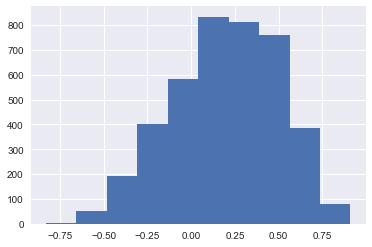

In [244]:
features.int_corr.isnull().sum()
plt.hist(features.int_corr.dropna())

In [245]:
features.age_x.describe(), features.age_y.describe()

(count    4155.000000
 mean       26.621901
 std         3.422257
 min        18.000000
 25%        24.000000
 50%        27.000000
 75%        29.000000
 max        42.000000
 Name: age_x, dtype: float64, count    4119.000000
 mean       26.105851
 std         3.683108
 min        19.000000
 25%        23.000000
 50%        26.000000
 75%        28.000000
 max        55.000000
 Name: age_y, dtype: float64)

In [246]:
## feature engineering part, for age and the involved 5 attributes, the difference between two 
## partners will play an important role instead of the absolute value for each attribute
features['age_diff'] = features['age_x'] - features['age_y']
features['attr_diff'] = features['attr_y'] - features['attr_x']
features['sinc_diff'] = features['sinc_y'] - features['sinc_x']
features['intel_diff'] = features['intel_y'] - features['intel_x']
features['fun_diff'] = features['fun_y'] - features['fun_x']
features['amb_diff'] = features['amb_y'] - features['amb_x']

In [247]:
features.race_y.unique()

array([  4.,   2.,   6.,   1.,   3.,  nan])

In [248]:
features.race_x.value_counts(), features.race_y.value_counts()

(2.0    2515
 4.0     933
 6.0     276
 3.0     261
 1.0     179
 Name: race_x, dtype: int64, 2.0    2207
 4.0    1045
 3.0     403
 6.0     245
 1.0     241
 Name: race_y, dtype: int64)

In [268]:
print("For men, what is total decision rate for each race of the opposite gender: ")
pd.crosstab(features.race_y, men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

For men, what are total decision rate for each race of the opposite gender: 


dec,0,1
race_y,,
1.0,0.56,0.44
2.0,0.50,0.50
3.0,0.48,0.52
4.0,0.59,0.41
6.0,0.53,0.47


The most attractive race group seems to be Latino/Hispanic American for men from the above results, followed by European/Caucasian American, black, asian.

In [269]:
print("For women, what is total decision rate for each race of the opposite gender: ")
pd.crosstab(features.race_x, women_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

For women, what are total decision rate for each race of the opposite gender: 


dec_o,0,1
race_x,,
1.0,0.63,0.37
2.0,0.59,0.41
3.0,0.64,0.36
4.0,0.74,0.26
6.0,0.68,0.32


The most attractive race group is European/Caucasian American for women, followed by black, latino/hispanic american. Sadly asian group is still the least attractive race group on average.

In [267]:
print("For men, how are you likely to see the partner again if she shares the same race as you?")
pd.crosstab(features.samerace,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

For men, if the partner are from the same race are more keen to go for a date?


dec,0,1
samerace,,
0,0.53,0.47
1,0.53,0.47


In [266]:
print("For women, how are you likely to see the partner again if he shares the same race as you?")
pd.crosstab(features.samerace,women_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

For women, if the partner are from the same race are more keen to go for a date?


dec_o,0,1
samerace,,
0,0.65,0.35
1,0.61,0.39


The difference between decision rate for men considering if the two are same race is 0, it seems that men do not care too much about that. While for women, there is a little positive effect for decision rate if both are the same race group.

In [270]:
features['same_place'] = features['from_x'] == features['from_y']
print(sum(features['same_place']))

77


The above results show that there are only 39 pairs from the same place, the input location should be errors or synonyms inside, let's take a look and try to corret most of them in a convenient way:

In [254]:
features.from_x.value_counts().head(30)

New York               167
New Jersey             152
Italy                  132
Spain                   87
Israel                  86
Boston                  85
Philadelphia            82
Germany                 80
California              80
India                   79
France                  76
New York City           71
Chicago                 66
Russia                  64
Miami                   55
Greece                  53
San Francisco           51
NYC                     46
new york                41
Washington, DC          41
Los Angeles, CA         40
Connecticut             40
Canada                  40
Bangladesh              40
Boston, MA              40
Houston                 39
Maryland                37
Texas                   36
Northern New Jersey     36
Cincinnati, Ohio        34
Name: from_x, dtype: int64

In [255]:
# The above list contains the top 30 places where participants come from, we can clearly see that there are many synonyms or 
# at least similar places like 'New York', 'NYC', 'New York City' which should belong to the same category. Let's clean
# the data a little bit and assign similar places to one according to the top 30 places:
features.loc[features.from_x.isin(['NYC', 'New York City','new york']), 'from_x'] = 'New York'
features.loc[features.from_x == 'Northern New Jersey','from_x'] = 'New Jersey'
features.loc[features.from_x.isin(['San Francisco', 'Los Angeles, CA']), 'from_x'] = 'California'
features.loc[features.from_x == 'Houston', 'from_x'] = 'Texas'
features.loc[features.from_x == 'Boston, MA', 'from_x'] = 'Boston'

In [256]:
features.from_y.value_counts().head(30)

New York               354
California             221
New Jersey             212
China                  114
Taiwan                  98
Texas                   84
Maryland                68
NYC                     63
New York City           59
Pennsylvania            50
Ohio                    46
Washington, DC          46
Brooklyn, NY            45
Mexico                  43
NJ                      42
Hong Kong               41
Los Angeles             40
Boston                  38
Michigan                38
England                 38
PA                      36
Minnesota               34
Northern California     34
San Francisco           33
Long Island             33
Florida                 32
Arizona                 32
Chicago                 29
Connecticut             29
India                   28
Name: from_y, dtype: int64

In [257]:
features.loc[features.from_y.isin(['NYC', 'New York City','Brooklyn, NY', 'Long Island']), 'from_y'] = 'New York'
features.loc[features.from_y == 'NJ','from_y'] = 'New Jersey'
features.loc[features.from_y.isin(['San Francisco', 'Northern California', 'Los Angeles']), 'from_y'] = 'California'
features.loc[features.from_y == 'PA', 'from_y'] = 'Pennsylvania'

In [258]:
features['same_place'] = features['from_x'] == features['from_y']
print(sum(features['same_place']))

77


In [271]:
print("For men, if the partner are from the same race are more keen to go for a da?")
pd.crosstab(features.same_place,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec,0,1
same_place,,
False,0.52,0.48
True,0.62,0.38


In [272]:
pd.crosstab(features.same_place,women_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec_o,0,1
same_place,,
False,0.63,0.37
True,0.66,0.34


The interesting find here is people from the same state/place seem to have a negative effect on the final decision for both genders. Let's go on exploring more about the effect of field of study on final decision:

In [273]:
features['same_field'] = features['field_cd_x'] == features['field_cd_y']
print(sum(features['same_field']))

480


In [274]:
pd.crosstab(features.same_field,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec,0,1
same_field,,
False,0.54,0.46
True,0.43,0.57


In [275]:
pd.crosstab(features.same_field,women_dec).apply(lambda r: r/r.sum(), axis=1).round(2)

dec_o,0,1
same_field,,
False,0.64,0.36
True,0.60,0.40


In [265]:
pd.crosstab(features.field_cd_y,men_dec).apply(lambda r: r/r.sum(), axis=1).round(2).sort_values([1], ascending=False).head(10)

dec,0,1
field_cd_y,,
16.0,0.19,0.81
4.0,0.33,0.67
18.0,0.33,0.67
2.0,0.39,0.61
8.0,0.40,0.60
13.0,0.45,0.55
7.0,0.48,0.52
1.0,0.51,0.49
10.0,0.51,0.49


In [276]:
pd.crosstab(features.field_cd_x,women_dec).apply(lambda r: r/r.sum(), axis=1).round(2).sort_values([1], ascending=False).head(10)

dec_o,0,1
field_cd_x,,
16.0,0.22,0.78
4.0,0.39,0.61
18.0,0.54,0.46
8.0,0.58,0.42
12.0,0.58,0.42
14.0,0.59,0.41
17.0,0.60,0.40
1.0,0.60,0.40
6.0,0.65,0.35


This time we can see there is a positive effect on the final decision for both genders if coming from the same study field. What's more, different field for each gender shows to get different accept rate for the opposite gender, so we will also include both fields for men and women.

In [277]:
features.head()

,samerace,int_corr,age_x,race_x,attr_x,sinc_x,intel_x,fun_x,amb_x,age_y,attr_y,sinc_y,intel_y,fun_y,amb_y,race_y,from_x,from_y,field_cd_x,field_cd_y,age_diff,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,same_place,same_field
100,0,0.14,27.0,2.0,6.0,8.0,8.0,8.0,8.0,21.0,6.0,9.0,7.0,7.0,6.0,4.0,Argentina,Chicago,8.0,1.0,6.0,0.0,1.0,-1.0,-1.0,-2.0,False,False
101,1,0.29,27.0,2.0,8.0,7.0,6.0,9.0,7.0,24.0,5.0,7.0,8.0,4.0,6.0,2.0,Argentina,Alabama,8.0,1.0,3.0,-3.0,0.0,2.0,-5.0,-1.0,False,False
102,1,-0.24,27.0,2.0,7.0,8.0,6.0,5.0,8.0,25.0,7.0,9.0,10.0,7.0,8.0,2.0,Argentina,Connecticut,8.0,2.0,2.0,0.0,1.0,4.0,2.0,0.0,False,False
103,1,-0.18,27.0,2.0,6.0,7.0,8.0,7.0,7.0,23.0,4.0,10.0,8.0,5.0,8.0,2.0,Argentina,Texas,8.0,1.0,4.0,-2.0,3.0,0.0,-2.0,1.0,False,False
104,1,-0.43,27.0,2.0,6.0,8.0,8.0,8.0,7.0,21.0,5.0,8.0,8.0,2.0,2.0,2.0,Argentina,Bowdoin College,8.0,1.0,6.0,-1.0,0.0,0.0,-6.0,-5.0,False,False


Let's go beyond the attributes scores and look into more other available interesting features in the dataset. This time I would like to apply classification algorithm on it to predict match probability using random forest:

In [288]:
features=features.rename(columns = {'age_x':'age_men', 'race_x':'race_men', 'attr_x':'attr_women', 'sinc_x':'sinc_women',
                                   'intel_x':'intel_women', 'fun_x':'fun_women', 'amb_x':'amb_women', 'age_y':'age_women',
                                   'attr_y':'attr_men', 'sinc_y':'sinc_men', 'intel_y':'intel_men', 'fun_y':'fun_men',
                                   'amb_y':'amb_men', 'race_y':'race_women', 'field_cd_x':'field_men', 'field_cd_y':'field_women',
                                   'from_x':'from_men', 'from_y':'from_women'})

In [289]:
pd.isnull(features).any(axis = 0)

samerace       False
int_corr       False
age_men        False
race_men       False
attr_women     False
sinc_women     False
intel_women    False
fun_women      False
amb_women      False
age_women      False
attr_men       False
sinc_men       False
intel_men      False
fun_men        False
amb_men        False
race_women     False
from_men       False
from_women     False
field_men      False
field_women    False
age_diff       False
attr_diff      False
sinc_diff      False
intel_diff     False
fun_diff       False
amb_diff       False
same_place     False
same_field     False
dtype: bool

In [290]:
#features.race_men = features.race_men.fillna(features.race_men.mode())
#pd.isnull(features.race_men).sum()
features.fillna({'race_men':features.race_men.mode()[0], 'race_women':features.race_women.mode()[0],
                'from_men':features.from_men.mode()[0], 'from_women':features.from_women.mode()[0],
                'field_men':features.field_men.mode()[0], 'field_women':features.field_women.mode()[0]}, inplace=True)
features.fillna(features.mean(), inplace=True)

In [291]:
pd.isnull(match).any(), pd.isnull(men_dec).any(), pd.isnull(women_dec).any()

(False, False, False)

In [292]:
pd.isnull(features).any(axis = 0)

samerace       False
int_corr       False
age_men        False
race_men       False
attr_women     False
sinc_women     False
intel_women    False
fun_women      False
amb_women      False
age_women      False
attr_men       False
sinc_men       False
intel_men      False
fun_men        False
amb_men        False
race_women     False
from_men       False
from_women     False
field_men      False
field_women    False
age_diff       False
attr_diff      False
sinc_diff      False
intel_diff     False
fun_diff       False
amb_diff       False
same_place     False
same_field     False
dtype: bool

Before the final modeling period, we make sure there are not missing values for all predictors and target variables.

### Model for men's decision

In [293]:
men_dec.mean()

0.47466539196940727

In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
features.from_men = lb.fit_transform(features.from_men.astype(str))
features.from_women = lb.fit_transform(features.from_women.astype(str))
features.race_men = lb.fit_transform(features.race_men)
features.race_women = lb.fit_transform(features.race_women)
features.field_men = lb.fit_transform(features.field_men)
features.field_women = lb.fit_transform(features.field_women)
trainM, testM, tar_trainM, tar_testM  =   train_test_split(features, men_dec, test_size=.3, random_state = 123)
forest_men = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_men.fit(trainM, tar_trainM)
print(forest_men.feature_importances_)
print(forest_men.oob_score_)
y_predicted_m = forest_men.predict_proba(testM)[:, 1]
predM = forest_men.predict(testM)
print(metrics.confusion_matrix(tar_testM, predM))
print(metrics.accuracy_score(tar_testM, predM))

[ 0.00802165  0.04607553  0.03913183  0.01724344  0.15626788  0.02659945
  0.02777415  0.08802383  0.02750081  0.03223127  0.02622966  0.02605548
  0.02412125  0.02731775  0.02666807  0.015657    0.05477493  0.04279474
  0.02695717  0.029694    0.03750887  0.06992156  0.02801549  0.02684824
  0.03573769  0.02706681  0.0006482   0.00511326]
0.76468579235
[[506 140]
 [162 448]]
0.759554140127


Since the training accuracy and testing accuracy score are almost the same, there should not be over-fitting happened for the current model training, let's plot the ROC curve and visualize the corresponding variable importance for each attribute:

ROC AUC: 0.84


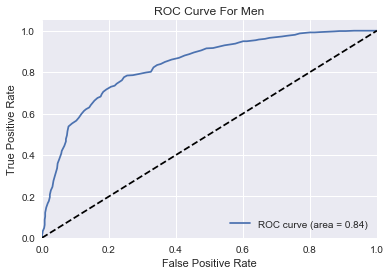

In [295]:
from sklearn.metrics import roc_curve, auc
 
fpr, tpr, _ = metrics.roc_curve(tar_testM, y_predicted_m)

roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Men')
plt.legend(loc="lower right")
plt.show()

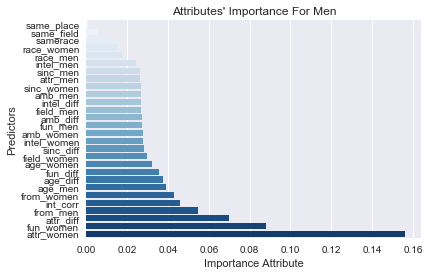

In [296]:
FeaturesImportanceM = sorted(zip(forest_men.feature_importances_,features.columns))
dfMale = pd.DataFrame(FeaturesImportanceM, columns=['model.feature_importances_', 'predictors.columns'])
ax1 = sns.barplot(y="predictors.columns", x="model.feature_importances_", data=dfMale,
             palette="Blues")
ax1.set(ylabel='Predictors', xlabel='Importance Attribute',title="Attributes' Importance For Men")
plt.show(ax1)

From the attributes' importance plot, women's attrativeness, fun and the attractive difference are the three most important factor for men's decision. The place where men or women come from and their interest correlation also play an important part during this process. However the three additional vairable generated 'sample_place', 'same_field' and 'same_race' are the three least important variables, it seems for speed dating purpose, if two people share the same race culture, education background or come from the same place are not that important for men..

### Model for women's decision

In [298]:
women_dec.mean()

0.36543977055449328

In [299]:
trainW, testW, tar_trainW, tar_testW  = train_test_split(features, women_dec, test_size=.3, random_state = 123)
forest_women = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_women.fit(trainW, tar_trainW)
print(forest_women.feature_importances_)
print(forest_women.oob_score_)
y_predicted_w = forest_women.predict_proba(testW)[:, 1]
predW = forest_women.predict(testW)
print(metrics.confusion_matrix(tar_testW, predW))
print(metrics.accuracy_score(tar_testW, predW))

[ 0.00950932  0.05139105  0.03263287  0.02093492  0.02793428  0.02512454
  0.02259972  0.02702204  0.02775146  0.04133147  0.11282023  0.0309853
  0.03122009  0.07658423  0.02873184  0.02389284  0.04669873  0.05166876
  0.02814184  0.03883351  0.0397768   0.06250756  0.02933072  0.02556091
  0.04837255  0.03110311  0.00137241  0.00616688]
0.749658469945
[[694 108]
 [170 284]]
0.778662420382


ROC AUC: 0.84


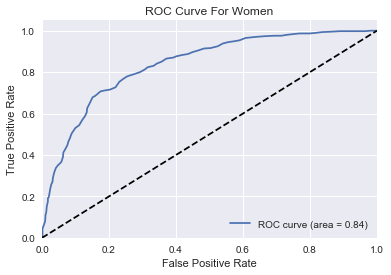

In [300]:
fpr, tpr, _ = metrics.roc_curve(tar_testW, y_predicted_w)

roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Women')
plt.legend(loc="lower right")
plt.show()

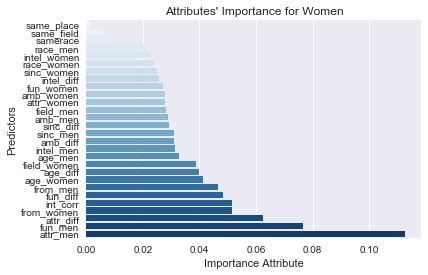

In [301]:
FeaturesImportanceW = sorted(zip(forest_women.feature_importances_,features.columns))
dfFemale = pd.DataFrame(FeaturesImportanceW, columns=['model.feature_importances_', 'predictors.columns'])
ax2 = sns.barplot(y="predictors.columns", x="model.feature_importances_", data=dfFemale,
             palette="Blues")
ax2.set(ylabel='Predictors', xlabel='Importance Attribute',title="Attributes' Importance for Women")
plt.show(ax2)

The result is the same with what we found in men for the three most important and least important features for men. At this time, men's attractiveness and fun are very important as well as the attractive difference between men and women. The three additional features created are still not important for the final decision.

### Model for Match Rate

In [353]:
match.mean(), 1 - match.mean()

(0.16491395793499045, 0.83508604206500958)

In [303]:
train_match, test_match, tar_train_match, tar_test_match  = train_test_split(features, match, test_size=.3, random_state = 123)
forest_match = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_match.fit(train_match, tar_train_match)
print(forest_match.feature_importances_)
print(forest_match.oob_score_)
y_predicted_match = forest_match.predict_proba(test_match)[:, 1]
pred_match = forest_match.predict(test_match)
print(metrics.confusion_matrix(tar_test_match, pred_match))
print(metrics.accuracy_score(tar_test_match, pred_match))

[ 0.00847016  0.06367852  0.0353984   0.01746054  0.06836565  0.02624312
  0.02282465  0.04724969  0.03180627  0.04241377  0.0606495   0.03174496
  0.02879805  0.06216241  0.02879112  0.02236482  0.05593457  0.0545497
  0.03279285  0.03915877  0.04370048  0.04385237  0.0292944   0.02765229
  0.03382929  0.03119372  0.00070041  0.00891953]
0.848019125683
[[1026   19]
 [ 161   50]]
0.856687898089


From the accuracy we got from the match model, we find the resulting accuracy is not a big improvement compared to the baseline where we simple predict as no match, leading a accuracy of 0.835. For this model, the required dataset is unbalanced, most of the class is unmatch, so downsampling the nomatch group will be a good idea for a better performance model:

In [339]:
from numpy import random
sum(match == 1), sum(match == 0), features.shape

(690, 3494, (4184, 28))

In [340]:
match_group = features[match == 1]
nomatch_group = features[match == 0]
nomatch_group.shape

(3494, 28)

In [341]:
## randomly with replacement get the number of rows for no match the same as match group
sample_index = random.choice(3494, 690, replace = False)

In [354]:
sample = nomatch_group.iloc[sample_index,:]

In [355]:
sample.shape

(690, 28)

In [356]:
newsample = pd.concat([sample, match_group])

In [357]:
newsample.head()

,samerace,int_corr,age_men,race_men,attr_women,sinc_women,intel_women,fun_women,amb_women,age_women,attr_men,sinc_men,intel_men,fun_men,amb_men,race_women,from_men,from_women,field_men,field_women,age_diff,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,same_place,same_field
4678,0,0.10,25.0,1,8.0,8.0,7.0,6.0,7.0,22.0,7.0,6.0,6.0,6.0,6.0,3,137,16,4,8,3.0,-1.0,-2.0,-1.0,0.0,-1.0,False,False
3261,0,0.46,26.0,1,7.0,7.0,7.0,7.0,7.0,24.0,7.0,7.0,7.0,7.0,7.0,4,144,2,7,11,2.0,0.0,0.0,0.0,0.0,0.0,False,False
8103,0,0.38,24.0,1,5.0,6.0,6.0,7.0,5.0,22.0,6.0,8.0,8.0,8.0,7.0,3,152,80,4,4,2.0,1.0,2.0,2.0,1.0,2.0,False,True
1641,1,0.40,27.0,3,3.0,6.0,5.0,5.0,3.0,26.0,6.0,6.0,6.0,6.0,6.0,3,154,102,7,4,1.0,3.0,0.0,1.0,1.0,3.0,False,False
962,0,-0.34,21.0,1,4.0,8.0,6.0,6.0,5.0,29.0,2.0,10.0,10.0,1.0,7.0,4,136,132,0,2,-8.0,-2.0,2.0,4.0,-5.0,2.0,False,False


In [358]:
newmatch = [0] * 690 + [1] * 690

In [359]:
train_match, test_match, tar_train_match, tar_test_match  = train_test_split(newsample, newmatch, test_size=.3, random_state = 123)
forest_match = RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True)
forest_match.fit(train_match, tar_train_match)
print(forest_match.feature_importances_)
print(forest_match.oob_score_)
y_predicted_match = forest_match.predict_proba(test_match)[:, 1]
pred_match = forest_match.predict(test_match)
print(metrics.confusion_matrix(tar_test_match, pred_match))
print(metrics.accuracy_score(tar_test_match, pred_match))

[ 0.00848855  0.05295365  0.03052097  0.01605823  0.0723995   0.02571269
  0.02405144  0.06461043  0.02628629  0.03506432  0.08862654  0.02624657
  0.02761444  0.09332469  0.02756415  0.02032297  0.04692958  0.04622017
  0.02405584  0.03727988  0.03553474  0.04420169  0.02608055  0.02422347
  0.03912766  0.0303986   0.00084611  0.00525628]
0.749482401656
[[159  44]
 [ 68 143]]
0.729468599034


ROC AUC: 0.83


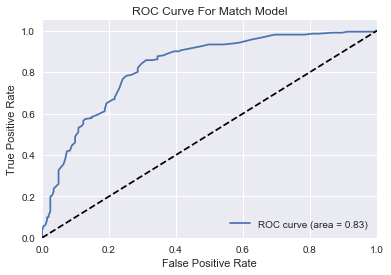

In [360]:
fpr, tpr, _ = metrics.roc_curve(tar_test_match, y_predicted_match)

roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Match Model')
plt.legend(loc="lower right")
plt.show()

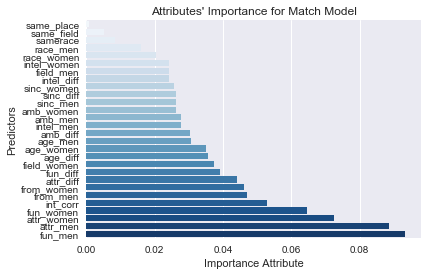

In [361]:
FeaturesImportance_Match = sorted(zip(forest_match.feature_importances_,features.columns))
dfMatch = pd.DataFrame(FeaturesImportance_Match, columns=['model.feature_importances_', 'predictors.columns'])
ax4 = sns.barplot(y="predictors.columns", x="model.feature_importances_", data=dfMatch,
             palette="Blues")
ax4.set(ylabel='Predictors', xlabel='Importance Attribute',title="Attributes' Importance for Match Model")
plt.show(ax3)

In [ ]:
After performing downsampling and generating the new model, 